# Librerías

Se importan las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict

# Datos

Se importa la base de datos previamente procesada

In [2]:
drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [3]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Concentración 7to/Elisabetta"
!ls  # show current directory

/content/gdrive/MyDrive/Colab Notebooks/Concentración 7to/Elisabetta
Automobile.csv	df_procesado.csv


In [4]:
data = pd.read_csv('df_procesado.csv')

In [5]:
pd.set_option('display.max_columns', None) # Muestra todas las columnas
data

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,120.5,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,120.5,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,120.5,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


Aquí se puede ver que los valores de los datos varían de tamaño por lo que en el futuro será necesario hacer una transformación para que estén dentro de un rango

In [6]:
data.describe()

,symboling,normalized-losses,number-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,121.723881,3.135554,98.797015,174.200995,65.889055,53.766667,2555.666667,4.363184,126.875622,3.330692,3.257117,10.164279,103.350865,5117.104581,25.179104,30.686567,13207.129353
std,1.254802,32.001557,0.988274,6.066366,12.322175,2.101471,2.447822,517.296727,1.059452,41.546834,0.268072,0.316051,4.004965,37.368448,478.137610,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,4.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,120.500000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,4.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


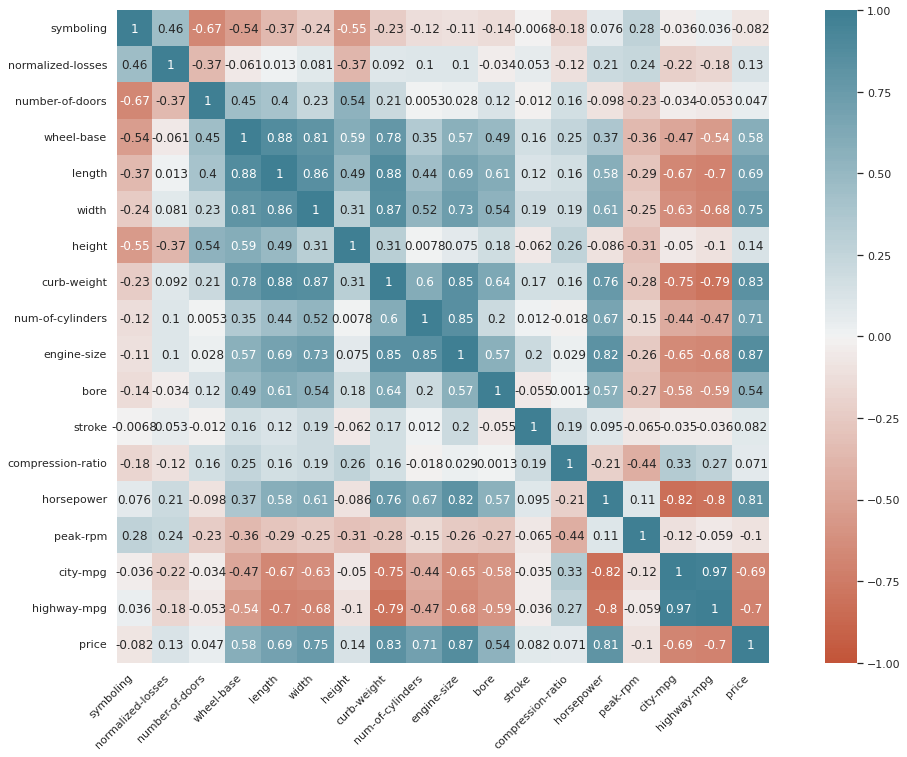

In [7]:
import seaborn as sns
corr = data.corr()
sns.set(rc = {'figure.figsize':(20,12)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

División del dataset en entrenamiento y prueba

In [8]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
number-of-doors      float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Se trabajará únicamente con las variables numéricas para tener un modelo que use una cantidad mediana de variables

In [9]:
numeric_data = data.drop(columns =['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'])

## Estandarización

Aquí se transforman los valores de los datos para trabajar con valores más cercanos

In [10]:
# standardization of dependent variables
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

In [11]:
scaled_data.describe()

,symboling,normalized-losses,number-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,2.010000e+02,201.000000,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02
mean,7.070077e-17,0.000000,2.474527e-16,2.121023e-16,-1.060512e-16,8.705032e-16,4.949054e-16,3.004783e-16,-2.474527e-16,-3.755978e-17,1.767519e-17,2.545228e-15,-7.070077e-17,4.418798e-18,-7.070077e-16,5.302558e-17,-2.143117e-16,-5.302558e-17
std,1.002497e+00,1.002497,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00
min,-2.269593e+00,-1.776961,-1.151897e+00,-2.015617e+00,-2.693002e+00,-2.666233e+00,-2.443627e+00,-2.069088e+00,-2.236142e+00,-1.589534e+00,-2.956916e+00,-3.765471e+00,-7.920616e-01,-1.484918e+00,-2.027699e+00,-1.900840e+00,-2.160369e+00,-1.020418e+00
25%,-6.717359e-01,-0.649207,-1.151897e+00,-7.101029e-01,-6.021238e-01,-8.534602e-01,-7.235321e-01,-7.493419e-01,-3.436598e-01,-6.967491e-01,-6.757245e-01,-4.666478e-01,-3.915600e-01,-8.947157e-01,-6.648637e-01,-9.643968e-01,-8.364843e-01,-6.852457e-01
50%,1.271926e-01,-0.038340,8.768873e-01,-2.969656e-01,-8.143809e-02,-1.855967e-01,1.365155e-01,-2.745434e-01,-3.436598e-01,-1.659041e-01,-7.737937e-02,1.043023e-01,-2.914346e-01,-2.240317e-01,-3.586267e-02,-1.840274e-01,-1.009929e-01,-3.673558e-01
75%,9.261211e-01,0.478547,8.768873e-01,5.954111e-01,7.565404e-01,3.391531e-01,7.098805e-01,7.176887e-01,-3.436598e-01,3.408116e-01,9.323281e-01,4.849358e-01,-1.913092e-01,3.393429e-01,8.028054e-01,7.524158e-01,4.874003e-01,4.153851e-01
max,1.725050e+00,4.206401,8.768873e-01,3.652627e+00,2.757926e+00,2.915198e+00,2.470930e+00,2.926955e+00,7.226270e+00,4.804736e+00,2.278605e+00,2.895614e+00,3.212954e+00,4.256138e+00,3.109143e+00,3.717819e+00,3.429366e+00,4.061027e+00


## División del dataset de entrenamiento y prueba

In [12]:
X = scaled_data.drop(columns=['price'])
y = scaled_data['price']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size = 0.8, random_state = 1234, shuffle = True)
X_train = pd.DataFrame(X_train, columns=scaled_data.drop(columns=['price']).columns)
y_train = pd.DataFrame(y_train, columns=['price'])
X_test = pd.DataFrame(X_test, columns=scaled_data.drop(columns=['price']).columns)
y_test = pd.DataFrame(y_test, columns=['price'])

# Modelo

Como solo se va a trabajar con variables numéricas, se optó por utilizar en modelo de regresión lineal

El modelo busca describir el comportamiento del conjunto de datos, para esto utiliza la estadística con valores numéricos

In [13]:
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

Los coeficientes del modelo son los siguientes, obteniendo un coeficiente de determinación de R^2 de 0.86

In [14]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X=X_train, y=y_train))

Intercept: [0.00634938]
Coeficiente: [('symboling', 0.017794046475388254), ('normalized-losses', 0.0049385246516096964), ('number-of-doors', 0.02201150283394713), ('wheel-base', 0.032568908247970645), ('length', -0.18566042959666987), ('width', 0.22775272180511705), ('height', 0.08663531548657735), ('curb-weight', 0.03826340148549753), ('num-of-cylinders', -0.25068761451272503), ('engine-size', 0.942356814465353), ('bore', -0.11125413225970043), ('stroke', -0.20442737451020773), ('compression-ratio', 0.13733173785965175), ('horsepower', 0.2020121146445763), ('peak-rpm', 0.13839431917046963), ('city-mpg', -0.22173549557565125), ('highway-mpg', 0.15906294137368773)]
Coeficiente de determinación R^2: 0.8642511842607332


Sin embargo al sacar otras métricas las evaluaciones son menores, por lo que se decide elegir solo ciertas variables

In [16]:
lm = LinearRegression()
# Fit our training data
model = lm.fit(X_train, y_train)

# Perform 6-fold cross validation
scores = cross_val_score(modelo, X, y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=6)
r2 = metrics.r2_score(y, predictions)
print("Cross-Predicted r^2 score:", r2)

Cross-validated scores: [ 0.70711471  0.73865605  0.83331332  0.01627911 -1.79382216  0.56282368]
Cross-Predicted r^2 score: 0.6464177242339472


# Elección de las columnas numéricas

Se hace un variance inflation factor donde los signos de los coeficientes del modelo deben coincidir con los signos del VIF de cada variable, así se reduce el número de variables y se reduce el overfitting del modelo

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
def calc_vif(X):
  vif = pd.DataFrame()
  vif['inpu_variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [19]:
X_train_drop = X_train.drop(columns=['symboling', 'normalized-losses', 'number-of-doors',
                          'wheel-base', 'length','height','bore', 'stroke', 'compression-ratio','city-mpg'])
calc_vif(X_train_drop)

,inpu_variables,VIF
0,width,5.070989
1,curb-weight,12.637394
2,num-of-cylinders,4.545192
3,engine-size,13.800335
4,horsepower,6.930483
5,peak-rpm,1.822147
6,highway-mpg,4.433264


In [20]:
# Características de salida
y = y_train

# Generar el modelo de regresión
import statsmodels.api as sm
X = sm.add_constant(X_train_drop)
model = sm.OLS(y,X_train_drop).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              109.2
Date:                Fri, 16 Sep 2022   Prob (F-statistic):                    3.29e-56
Time:                        00:55:07   Log-Likelihood:                         -93.810
No. Observations:                 160   AIC:                                      201.6
Df Residuals:                     153   BIC:                                      223.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Modelo de Regresión Lineal

Ya que se redujeron el número de variables que se usaron para el modelo, se vuelve a entrenar y hacer una evaluación

In [21]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = X_train_drop,y_train

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.8328560623865631


# Evaluación del modelo

Esta vez ya no sucedió mucho overfitting y el score del modelo salió mejor

In [23]:
lm = LinearRegression()
# Fit our training data
model = lm.fit(X_train, y_train)

# Perform 6-fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(lm, X, y, cv=6)
r2 = metrics.r2_score(y, predictions)
print("Cross-Predicted r^2 score:", r2)

Cross-validated scores: [0.64358061 0.82707486 0.84230697 0.77675178 0.88512879 0.82341648]
Cross-Predicted r^2 score: 0.8142269246888858


# Correcciones de la entrega

Evaluación de r^2 en training y test

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [28]:
model = LinearRegression()  
model.fit(X_train,y_train)  
predictions = model.predict(X_test)

print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))

#print('Exactitud modelo: {}\n'.format(r2_score(y_test,predictions)))
print(model.intercept_, model.coef_) 
print('MAE',mean_absolute_error(y_test, predictions))
print('MSE',mean_squared_error(y_test, predictions))

Puntaje entrenamiento: 0.8642511842607332

Puntaje Test: 0.7244020411228247

[0.00634938] [[ 0.01779405  0.00493852  0.0220115   0.03256891 -0.18566043  0.22775272
   0.08663532  0.0382634  -0.25068761  0.94235681 -0.11125413 -0.20442737
   0.13733174  0.20201211  0.13839432 -0.2217355   0.15906294]]
MAE 0.28211387637587737
MSE 0.12217260242905967


La evaluación del puntaje de test es mejor que la de entrenamiento, lo que nos puede hablar de un overfitting en el modelo, pues si no existiera los puntajes no variarían mucho de valor. Se podría tratar de eliminar o trabajar el número de variables con las que se está trabajando pues no todas podrían ser de importancia y pueden estar afectando el desempeño del modelo.